# HW 7 [30 points]

# Problem 1 [15 points]

In statistics, there is a very important distribution called Poisson distribution:

https://en.wikipedia.org/wiki/Poisson_distribution

The points can be generated by using `np.random.poisson()` function:

https://numpy.org/doc/stable/reference/random/generated/numpy.random.poisson.html

1. Simulate 100,000 points from $Poisson(\lambda=2)$ distribution. [5 points]
2. Poisson random variable only takes discrete points (0,1,...). Determine the probability of getting $x=(0,1,...,10)$, and create a line graph that shows the pmf of $Poisson(\lambda=2)$ until $x=10$. [10 points]

In [15]:
import numpy as np
points = np.random.poisson(lam = 2, size = 100000)

In [16]:
points

array([3, 1, 1, ..., 2, 4, 1])

In [21]:
prob = []
for i in range(11):
    count = np.sum(points == i)
    prob.append(count / 100000)

In [22]:
prob

[0.13486,
 0.2718,
 0.27131,
 0.17853,
 0.09033,
 0.03643,
 0.01226,
 0.0035,
 0.00066,
 0.00027,
 5e-05]

In [25]:
x_list = []
for i in range(11):
    x_list.append(i)

In [26]:
x_list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

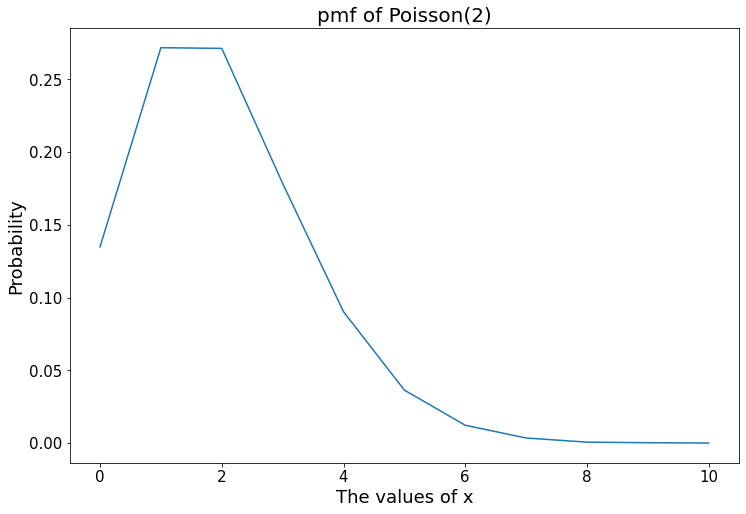

In [27]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize=(12,8))
axs.plot(x_list, prob)
plt.title('pmf of Poisson(2)', fontsize=20)
axs.set_xlabel('The values of x', fontsize=18)
axs.set_ylabel('Probability', fontsize=18)
axs.tick_params(labelsize=15)
plt.show()

# Problem 2 [15 points]

Use the points that you simulated in problem 1.

1. By using sampling without replacement, generate 10,000 sample means based on sample sizes of 25, 100, and 400 [5 points]
2. Create a grouped histogram of the 10,000 sample statistics for the three sample sizes [8 points]
3. Discuss the result. How does it connect to the central limit theorem? [2 points]

### Hint:

I would recommend you to review the section 4 of the previous lab, because I did a very similar thing there by using the salary dataset.

In [50]:
means25 = []

for i in range(1000):
    a = np.random.choice(points, size = 25, replace=False)
    means25.append(np.mean(a))

In [51]:
means100 = []

for i in range(1000):
    a = np.random.choice(points, size = 100, replace=False)
    means100.append(np.mean(a))

In [52]:
means400 = []

for i in range(1000):
    a = np.random.choice(points, size = 400, replace=False)
    means400.append(np.mean(a))

In [53]:
print("Max:", np.max(means25))
print("Min:", np.min(means25))

Max: 2.88
Min: 1.16


In [54]:
# Let's suppose that we want the spaces to be 0.05
# (3 - 1.2)/0.025 = 1.8 / 0.05 = 36
# We need 36 + 1 = 37 points

np.linspace(1.2, 3, 37)

array([1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 , 1.65, 1.7 ,
       1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15, 2.2 , 2.25,
       2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65, 2.7 , 2.75, 2.8 ,
       2.85, 2.9 , 2.95, 3.  ])

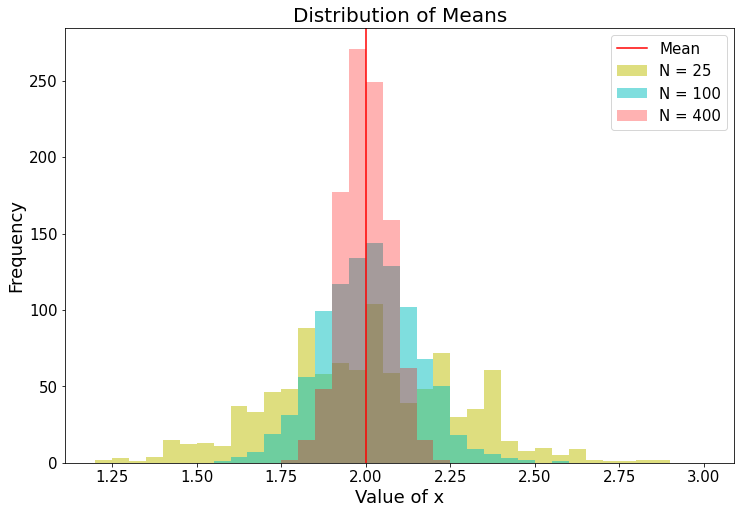

In [55]:
fig, axs = plt.subplots(figsize=(12,8))
axs.hist(means25, color="y", alpha=0.5, bins=np.linspace(1.2, 3, 37), label="N = 25")
axs.hist(means100, color="c", alpha=0.5, bins=np.linspace(1.2, 3, 37), label="N = 100")
axs.hist(means400, color="r", alpha=0.3, bins=np.linspace(1.2, 3, 37), label="N = 400")
axs.axvline(x = np.mean(points), color='r', label='Mean')

plt.title("Distribution of Means", fontsize=20)
axs.set_xlabel("Value of x", fontsize=18)
axs.set_ylabel("Frequency", fontsize=18)
axs.tick_params(labelsize=15)
axs.legend(prop={'size': 15})

plt.show()

### How does this relate to the central limit theorem?

1. These points are from Poisson distribution, which is not a normal distribution. However, the sample average from the Poisson distribution follows a normal distribution
2. Standard error (i.e. standard deviation of the sample average) = standard deviation of the data / sqrt(sample size). If we see the disribtuion of the sample averages, the sample average with a smaller sample size has a wider spread compared to the sample averages taken from a large sample size.